### Importing Libraries

<Figure size 640x480 with 0 Axes>

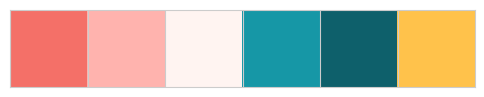

In [1]:
# Data manipulation and analysis
import pandas as pd
# Numerical computing and arrays
import numpy as np
# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Set the seaborn style to whitegrid and remove left and bottom spines
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
# Define a custom color palette
custom_palette = ['#f47068','#ffb3ae','#fff4f1','#1697a6','#0e606b','#ffc24b']
# Generate a color palette from the custom colors
sns.palplot(sns.color_palette(custom_palette))
# Format floating-point numbers to display two decimal places
pd.options.display.float_format = '{:.2f}'.format
# Set the display options to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Loading Data

In [2]:
df = pd.read_csv('airbnb_listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44077,https://www.airbnb.com/rooms/44077,20220911231053,2022-09-12,city scrape,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,I like our neighbourhood as there is no shorta...,https://a0.muscache.com/pictures/525706/050a3a...,193005,https://www.airbnb.com/users/show/193005,Teresa,2010-08-06,"Dublin, Ireland","I am a friendly outgoing Irishwoman ,who love...",within an hour,100%,99%,t,https://a0.muscache.com/im/users/193005/profil...,https://a0.muscache.com/im/users/193005/profil...,Churchtown,2,2,"['email', 'phone']",t,t,"Churchtown, Ireland",Dn Laoghaire-Rathdown,NaN,53.29,-6.26,Private room in bungalow,Private room,2,NaN,1.5 shared baths,1.00,2.00,"[""Oven"", ""Hot water kettle"", ""Fire extinguishe...",$70.00,3,1125,3,3,1125,1125,3.00,1125.00,NaN,t,2,11,18,104,2022-09-12,258,31,7,2011-03-20,2022-09-09,4.78,4.83,4.74,4.93,4.93,4.66,4.82,NaN,f,2,0,2,0,1.85
1,85156,https://www.airbnb.com/rooms/85156,20220911231053,2022-09-12,city scrape,Cosy Comfortable Irish Cottage 1 Double Bed,Our Cottage is a charming light filled cottage...,"I love Dundrum and its surrounding areas ,<br ...",https://a0.muscache.com/pictures/1749253/9ed2a...,193005,https://www.airbnb.com/users/show/193005,Teresa,2010-08-06,"Dublin, Ireland","I am a friendly outgoing Irishwoman ,who love...",within an hour,100%,99%,t,https://a0.muscache.com/im/users/193005/profil...,https://a0.muscache.com/im/users/193005/profil...,Churchtown,2,2,"['email', 'phone']",t,t,"Churchtown, Ireland",Dn Laoghaire-Rathdown,NaN,53.29,-6.26,Private room in bungalow,Private room,2,NaN,1.5 shared baths,1.00,1.00,"[""Oven"", ""Fire extinguisher"", ""Dryer"", ""Hanger...",$67.00,3,21,3,3,21,21,3.00,21.00,NaN,t,3,9,21,110,2022-09-12,210,28,4,2011-05-24,2022-09-11,4.79,4.86,4.74,4.90,4.88,4.64,4.78,NaN,f,2,0,2,0,1.53
2,159889,https://www.airbnb.com/rooms/159889,20220911231053,2022-09-12,city scrape,Friendly Single Room,Washing can be done at a cost of €5 per load....,Plenty of buses into the city and the area is ...,https://a0.muscache.com/pictures/3031697/a8259...,766611,https://www.airbnb.com/users/show/766611,Margaret,2011-07-01,"Dublin, Ireland",Used to host students and now I am looking fo...,within an hour,100%,95%,f,https://a0.muscache.com/im/users/766611/profil...,https://a0.muscache.com/im/users/766611/profil...,Beaumont,3,4,"['email', 'phone']",t,t,"Dublin, Ireland",Dublin City,NaN,53.39,-6.24,Private room in home,Private room,1,NaN,2 shared baths,1.00,1.00,"[""Oven"", ""Fire extinguisher"", ""Hangers"", ""Carb...",$45.00,2,21,1,2,21,21,2.00,21.00,NaN,t,1,16,36,290,2022-09-12,355,44,6,2012-03-20,2022-09-01,4.74,4.77,4.71,4.86,4.90,4.63,4.74,

### Analysing and Preparing Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7566 entries, 0 to 7565
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7566 non-null   int64  
 1   listing_url                                   7566 non-null   object 
 2   scrape_id                                     7566 non-null   int64  
 3   last_scraped                                  7566 non-null   object 
 4   source                                        7566 non-null   object 
 5   name                                          7566 non-null   object 
 6   description                                   7411 non-null   object 
 7   neighborhood_overview                         4194 non-null   object 
 8   picture_url                                   7566 non-null   object 
 9   host_id                                       7566 non-null   i

In [4]:
# Checking for duplicates
df.duplicated().any()

False

In [5]:
# Describe numerical columns in the DataFrame
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,7566.00,7566.00,7566.00,7566.00,7566.00,0.00,7566.00,7566.00,7566.00,0.00,7361.00,7472.00,7566.00,7566.00,7566.00,7566.00,7566.00,7566.00,7566.00,7566.00,0.00,7566.00,7566.00,7566.00,7566.00,7566.00,7566.00,7566.00,6209.00,6085.00,6086.00,6081.00,6085.00,6081.00,6079.00,0.00,7566.00,7566.00,7566.00,7566.00,6209.00
mean,126554254603401696.00,20220911231053.00,116534613.51,24.58,39.84,NaN,53.35,-6.25,3.01,NaN,1.52,1.83,6.25,528.21,5.80,7.48,632.19,647.93,6.38,640.93,NaN,2.96,8.18,15.01,64.80,32.14,7.42,0.96,4.60,4.78,4.65,4.83,4.84,4.73,4.61,NaN,4.16,2.36,1.58,0.18,1.32
std,258174854538063904.00,1.19,125777418.47,202.62,340.46,NaN,0.05,0.06,1.89,NaN,0.92,1.35,28.17,517.36,27.54,39.18,525.18,521.44,28.15,521.41,NaN,6.02,14.77,25.06,105.54,65.58,19.74,2.06,0.77,0.40,0.53,0.36,0.34,0.35,0.44,NaN,9.65,7.65,6.27,1.51,1.99
min,44077.00,20220911231053.00,43984.00,1.00,1.00,NaN,53.18,-6.53,1.00,NaN,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,NaN,1.00,0.00,0.00,0.00,0.01
25%,17420724.25,20220911231053.00,25005387.25,1.00,1.00,NaN,53.33,-6.28,2.00,NaN,1.00,1.00,1.00,15.00,1.00,1.00,21.00,28.00,1.00,28.00,NaN,0.00,0.00,0.00,0.00,1.00,0.00,0.00,4.56,4.74,4.52,4.81,4.82,4.63,4.50,NaN,1.00,0.00,0.00,0.00,0.13
50%,27980284.50,20220911231053.00,67735346.00,1.00,2.00,NaN,53.34,-6.26,2.00,NaN,1.00,1.00,2.00,365.00,2.00,2.00,1125.00,1125.00,2.00,1125.00,NaN,0.00,0.00,0.00,0.00,7.00,0.00,0.00,4.81,4.90,4.82,4.95,4.97,4.82,4.71,NaN,1.00,1.00,1.00,0.00,0.61
75%,50342040.50,20220911231053.00,162498772.00,3.00,4.00,NaN,53.36,-6.23,4.00,NaN,2.00,2.00,4.00,1125.00,3.00,4.00,1125.00,1125.00,4.00,1125.00,NaN,3.00,10.00,23.00,91.00,30.00,6.00,1.00,5.00,5.00,5.00,5.00,5.00,5.00,4.89,NaN,3.00,1.00,1.00,0.00,1.76
max,713034176403340288.00,20220911231053.00,478789356.00,2157.00,12017.00,NaN,53.63,-6.05,16.00,NaN,13.00,18.00,1125.00,1125.00,1125.00,1125.00,1125.00,1125.00,1125.00,1125.00,NaN,30.00,60.00,90.00,365.00,770.00,536.00,23.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,NaN,66.00,55.00,66.00,20.00,44.72


In [6]:
# Describe categorical (object) columns in the DataFrame
df.describe(include=['O'])

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
count,7566,7566,7566,7566,7411,4194,7566,7566,7566,7566,6232,3556,3932,3932,4191,7566,7566,7566,5234,7566,7566,7566,4194,7566,7566,7566,7562,7566,7566,7566,7566,6209,6209,7566
unique,7566,2,2,7368,7023,3577,7386,5436,2337,2506,441,2301,4,52,95,2,5328,5328,356,7,2,2,389,4,63,4,31,7062,547,2,2,2086,1458,2
top,https://www.airbnb.com/rooms/44077,2022-09-12,previous scrape,Student only - Pleasant room Close to The Poin...,Well situated and comfortable en-suite room ju...,"In this location, the chances are you won’t se...",https://a0.muscache.com/pictures/cd685d4d-4ff2...,https://www.airbnb.com/users/show/129230780,Paul,2017-05-07,"Dublin, Ireland",Hello from Staykeepers Homes! We are a group o...,within an hour,100%,100%,f,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/user_pic-225x...,The Liberties,"['email', 'phone']",t,t,"Dublin, County Dublin, Ireland",Dublin City,Entire rental unit,Entire home/apt,1 bath,"[""Essentials"", ""Hot water kettle"", ""Refrigerat...",$100.00,t,2022-09-12,2017-03-19,2022-08-28,f
freq,1,7033,4174,10,54,54,9,66,136,70,4295,67,2628,2769,1282,6589,121,121,238,5900,7445,5629,1127,5566,1518,3786,2581,34,235,7537,7033,38,196,4778


In [7]:
# Dropping columns that we do not need in analysis (they are not significant for analysis)
# Empty columns, columns with text data etc
df = df.drop(columns=['license','calendar_updated','bathrooms','neighbourhood_group_cleansed','listing_url','scrape_id',
                      'last_scraped','source','name','description','neighborhood_overview','picture_url','host_id','host_url',
                      'host_name','host_location','host_about','host_thumbnail_url','host_picture_url','host_neighbourhood',
                      'neighbourhood','calendar_last_scraped','id'])

In [8]:
# Drop rows with missing values in columns that we use in analysis (visualisation)
df = df.dropna(subset=['review_scores_rating','first_review','last_review','host_response_rate','host_acceptance_rate'])

In [9]:
# Resetting the index of a DataFrame after cleaning the missing values
df.reset_index(drop = True, inplace = True) 

In [10]:
# Remove the "$" symbol and convert to float format
df['price_$'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

In [11]:
# Convert object to numeric
# Convert 'host_response_rate' and 'host_acceptance_rate' to float by removing '%' and dividing by 100
df['host_response_rate'] = df['host_response_rate'].str.rstrip('%').astype('float') / 100.0
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.rstrip('%').astype('float') / 100.0
# Create a new variable 'new_variable' by multiplying 'response' and 'acceptance' columns
df['combined_response_acceptance'] = df['host_response_rate'] * df['host_acceptance_rate']

In [12]:
# Converting the 'host_since' feature to datetime type
df['host_since'] = pd.to_datetime(df['host_since'])
# Extracting the year from the 'host_since' feature and creating new numerical column
df['host_since_year'] = df['host_since'].dt.year

In [13]:
# Create a new column 'amenities_count' by counting the number of amenities in each row
df["amenities_count"] = df["amenities"].apply(lambda x: len(x.split(', ')))

In [14]:
# Fill missing values in the 'host_response_time' column with 'no info'
df['host_response_time'].fillna('no info', inplace=True)

In [15]:
# Selecting numeric variables of interest (that we use in the analysis)
df_numerical = df[['amenities_count','review_scores_rating','number_of_reviews','price_$','combined_response_acceptance']]

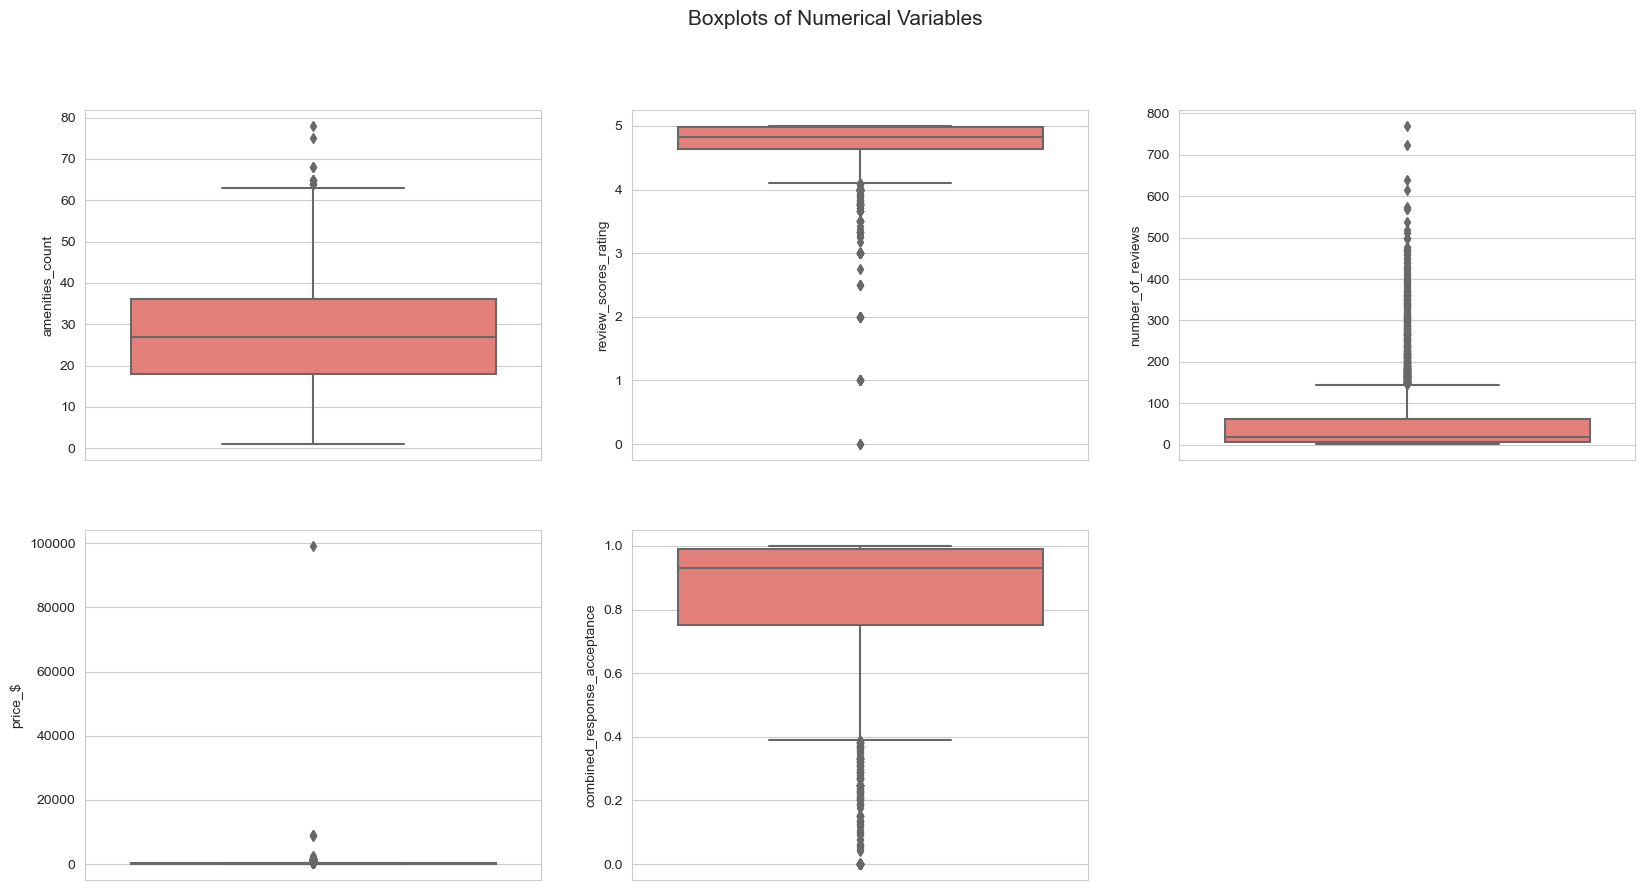

In [16]:
# Identifying outliers
# Visualization of the selected variables using box plots
plt.figure(figsize=(20,10))
count = 0
for variable in df_numerical:
    count += 1
    plt.subplot(2, 3, count)
    ax = sns.boxplot(y = variable, data =df, palette=custom_palette)
    
# Add a common title for all subplots
plt.suptitle('Boxplots of Numerical Variables', fontsize=15)
plt.show()

In [17]:
# Replace the value 99149.000000 in the 'price' column with 99.149
# Assuming it was a typo in which a comma and a period were mixed up
df['price_$'] = df['price_$'].replace(99149.000000, 99.149)

In [18]:
# Define a function to categorize prices into groups
def get_price_group(x):
    if x<=40:
        return '10-40'
    elif 40<x<=60:
        return '41-60'
    elif 60<x<=80:
        return '61-80'
    elif 80<x<=100:
        return '81-100'
    elif 100<x<=130:
        return '101-130'
    elif 130<x<=160:
        return '131-160'
    elif 160<x<=200:
        return '161-200'
    elif 200<x<=300:
        return '201-300'
    else:
        return '300+' 

# Apply the function to the 'price' column in the DataFrame and create a new column 'price_range'
df['price_range_$'] = df['price_$'].apply(get_price_group)

In [19]:
# Define a function to categorize ratings into different groups
def get_rating_group(x):
    if x <= 3:
        return '<=3'
    elif 3 < x <= 3.5:
        return '(3;3.5]'
    elif 3.5 < x <= 4:
        return '(3.5;4]'
    elif 4 < x <= 4.5:
        return '(4;4.5]'
    elif 4.5 < x <= 4.8:
        return '(4.5;4.7]'
    else:
        return '(4.7;5]'

# Applying the get_rating_group function to create a new column 'rating_range'
df['rating_range'] = df['review_scores_rating'].apply(get_rating_group)

### Visualisation and Statistics

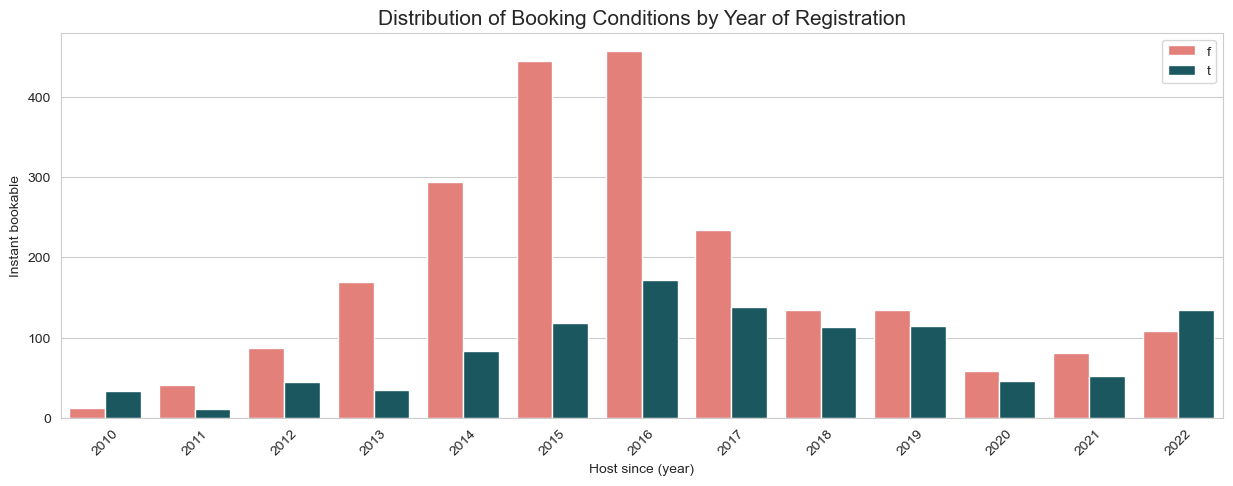

In [20]:
# Set the size of the figure
plt.figure(figsize=(15, 5))
# Create a count plot using Seaborn to visualize the distribution of booking conditions based on the year of host registration
sns.countplot(x='host_since_year', hue='instant_bookable', data=df, palette=[custom_palette[0], custom_palette[-2]])
# Add a legend to the upper right corner of the plot
plt.legend(loc='upper right')
# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)
# Set labels
plt.xlabel('Host since (year)')
plt.ylabel('Instant bookable')
# Set the title of the plot
plt.title('Distribution of Booking Conditions by Year of Registration', fontsize=15)
# Display the plot
plt.show()

#### It can been seen that after the year 2016, there has been a noticeable decrease in the gap between the possibility of instant booking and non-instant booking. In fact, after 2016, the number of listings available for instant booking is almost equal to 50% of all listings. Furthermore, in 2018 and 2022, the number of listings available for instant booking is even greater than those that require a non-instant booking process.

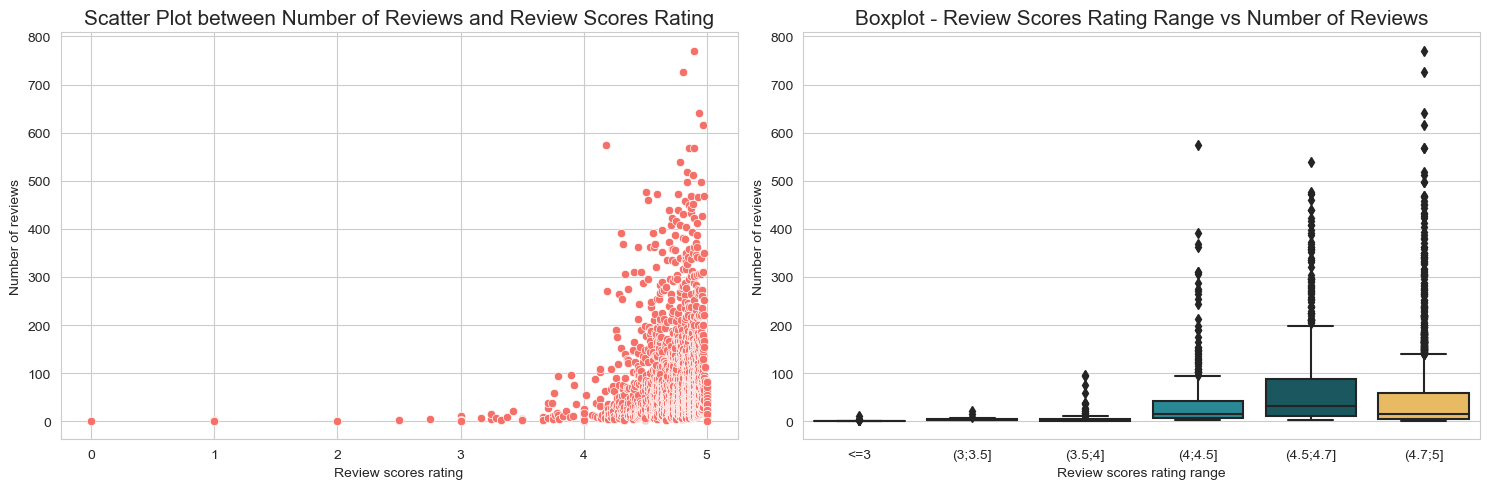

In [21]:
# Sorting the DataFrame by the 'review_scores_rating' column in ascending order
df.sort_values(by='review_scores_rating', ascending=True, inplace=True)

# Set the size of the figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Scatter plot on the first subplot
sns.scatterplot(x='review_scores_rating', y='number_of_reviews', data=df, color=custom_palette[0], ax=axes[0])
# Set labels
axes[0].set_xlabel('Review scores rating')
axes[0].set_ylabel('Number of reviews')
# Set the title for the plot
axes[0].set_title('Scatter Plot between Number of Reviews and Review Scores Rating', fontsize=15)

# Boxplot on the second subplot
sns.boxplot(x='rating_range', y='number_of_reviews', data=df, palette=custom_palette, ax=axes[1])
# Set labels and title
axes[1].set_xlabel('Review scores rating range')
axes[1].set_ylabel('Number of reviews')
axes[1].set_title('Boxplot - Review Scores Rating Range vs Number of Reviews', fontsize=15)
# Adjust layout for better spacing
plt.tight_layout()
# Display the plot
plt.show()

#### The higher the number of reviews, the higher review scores rating.

In [22]:
# Define a function for calculating Statistics
def calculate_statistics(df, group_by_column, target_column):
    # Group by 'group_by_column' and calculate statistics for 'target_column'
    stats = df.groupby(group_by_column)[target_column].agg(['count', 'mean', 'median', 'min', 'max', 'std'])
    
    # Interquartile range with quartiles
    def iqr_func(x):
        quartiles = x.quantile([0.25, 0.5, 0.75])
        return quartiles[0.75] - quartiles[0.25], quartiles[0.25], quartiles[0.5], quartiles[0.75]
    
    stats['iqr'], stats['Q1'], stats['Q2'], stats['Q3'] = zip(*df.groupby(group_by_column)[target_column].apply(iqr_func))
    
    # Mode
    mode = df.groupby(group_by_column)[target_column].apply(lambda x: x.mode().iloc[0])
    stats['mode'] = mode
    
    return stats

In [23]:
# Calculate statistics grouped by 'rating_range' for 'number_of_reviews'
stats_rating_reviews = calculate_statistics(df, 'rating_range', 'number_of_reviews')

# Define the order of rating ranges
rating_ranges_order = ['<=3', '(3;3.5]', '(3.5;4]', '(4;4.5]', '(4.5;4.7]', '(4.7;5]']
# Sort by 'rating_range' using the defined order
stats_rating_reviews = stats_rating_reviews.reindex(rating_ranges_order)
stats_rating_reviews

,count,mean,median,min,max,std,iqr,Q1,Q2,Q3,mode
rating_range,,,,,,,,,,,
<=3,41,1.61,1.00,1,12,1.81,0.00,1.00,1.00,1.00,1
(3;3.5],22,4.73,3.00,2,21,4.82,2.00,2.00,3.00,4.00,2
(3.5;4],144,6.98,2.00,1,97,14.61,4.25,1.00,2.00,5.25,1
(4;4.5],392,39.88,15.50,2,574,66.94,35.25,6.00,15.50,41.25,2
(4.5;4.7],941,67.01,32.00,3,538,85.02,76.00,11.00,32.00,87.00,3
(4.7;5],1811,50.58,16.00,1,770,85.43,54.00,4.00,16.00,58.00,1


#### There is a noticeable increase in the number of reviews as the rating increases from lower ranges to higher ones. This trend is evident from the mean and median values, which generally increase as the rating range becomes more positive. For instance, the mean number of reviews steadily increases from 1.61 for the lowest rating range (<=3) to 50.58 for the highest rating range (4.7;5]. Higher standard deviations, observed in the higher rating ranges, suggest more variability or dispersion in the number of reviews within those ranges. The 'min' and 'max' values provide insight into the range of extremes within each rating range. For instance, in the highest rating range (4.7;5], there is a minimum of 1 review and a maximum of 770 reviews, indicating a wide range of review counts even within the highest-rated listings. The IQR, which represents the range between the first quartile (Q1) and the third quartile (Q3), provides a measure of statistical dispersion. The larger the IQR, the more spread out the data points are. This is particularly evident in the higher rating ranges where the IQR is notably larger, indicating greater variability in review counts. The mode varies across different rating ranges, reflecting the distribution's shape and skewness. For example, the mode is 1 for the lowest and highest rating ranges, while it is 2 for the (3;3.5] and (4;4.5] ranges, and so on. Overall, these insights suggest a relationship between higher ratings and a higher number of reviews, with greater variability and spread in review counts as ratings become more positive. 

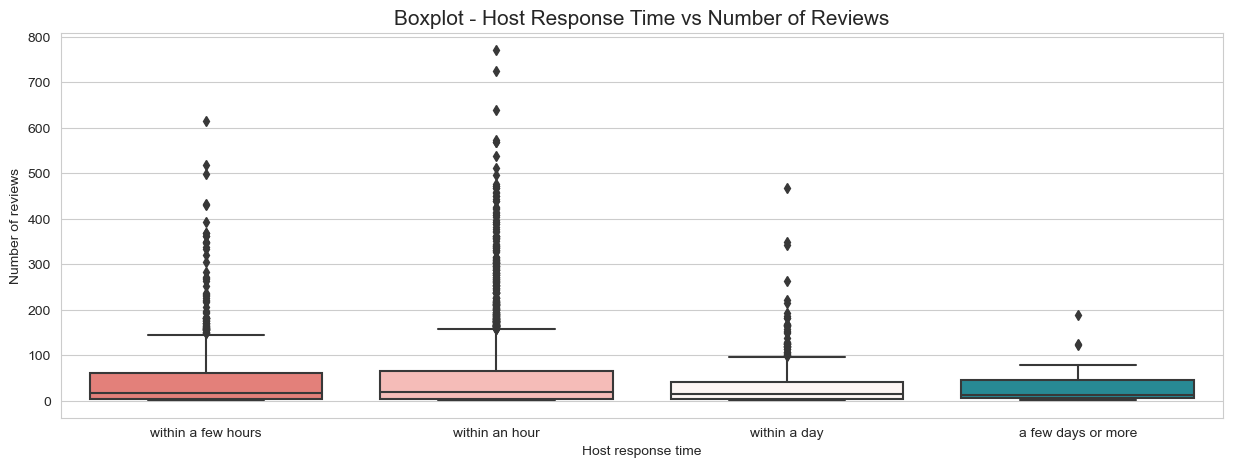

In [24]:
# Set the figure size for the plot
plt.figure(figsize=(15, 5)) 
# Create a boxplot using seaborn
sns.boxplot(x='host_response_time', y='number_of_reviews', data=df, palette=custom_palette)
# Set labels and title
plt.xlabel('Host response time')
plt.ylabel('Number of reviews')
plt.title('Boxplot - Host Response Time vs Number of Reviews', fontsize=15)
# Display the plot
plt.show()

#### The more promptly the host replies, the higher the number of reviews.

In [25]:
# Calculate statistics grouped by 'host_response_time' for 'number_of_reviews'
stats_response_time_reviews = calculate_statistics(df, 'host_response_time', 'number_of_reviews')
stats_response_time_reviews

,count,mean,median,min,max,std,iqr,Q1,Q2,Q3,mode
host_response_time,,,,,,,,,,,
a few days or more,50,28.28,12.00,1,189,37.17,40.00,5.25,12.00,45.25,7
within a day,395,35.56,14.00,1,468,53.95,37.00,5.00,14.00,42.00,3
within a few hours,640,51.38,18.00,1,616,80.75,56.25,4.00,18.00,60.25,1
within an hour,2266,54.33,19.00,1,770,86.58,61.00,5.00,19.00,66.00,1


#### The highest count is observed for hosts who respond within an hour (2266), followed by hosts responding within a few hours (640), within a day (395), and finally, hosts taking a few days or more to respond (50). This suggests that the majority of hosts tend to respond relatively quickly. The mean and median both show a gradual increase as the response time decreases, indicating that hosts with quicker response times tend to have higher average and typical numbers of reviews. Higher standard deviations, observed for hosts with quicker response times, indicate more variability in the number of reviews received. This suggests that while quicker response times generally correlate with more reviews, there are still considerable fluctuations within these categories. As expected, the IQR increases as response time decreases, indicating more variability in the number of reviews received by hosts with quicker response times. This suggests that hosts with faster response times may experience more fluctuation in review counts compared to hosts with longer response times. Overall, these insights reinforce the importance of prompt response times in generating higher review counts. However, variability in review counts exists within each response time category, indicating that factors other than response time may also influence the number of reviews received by hosts.

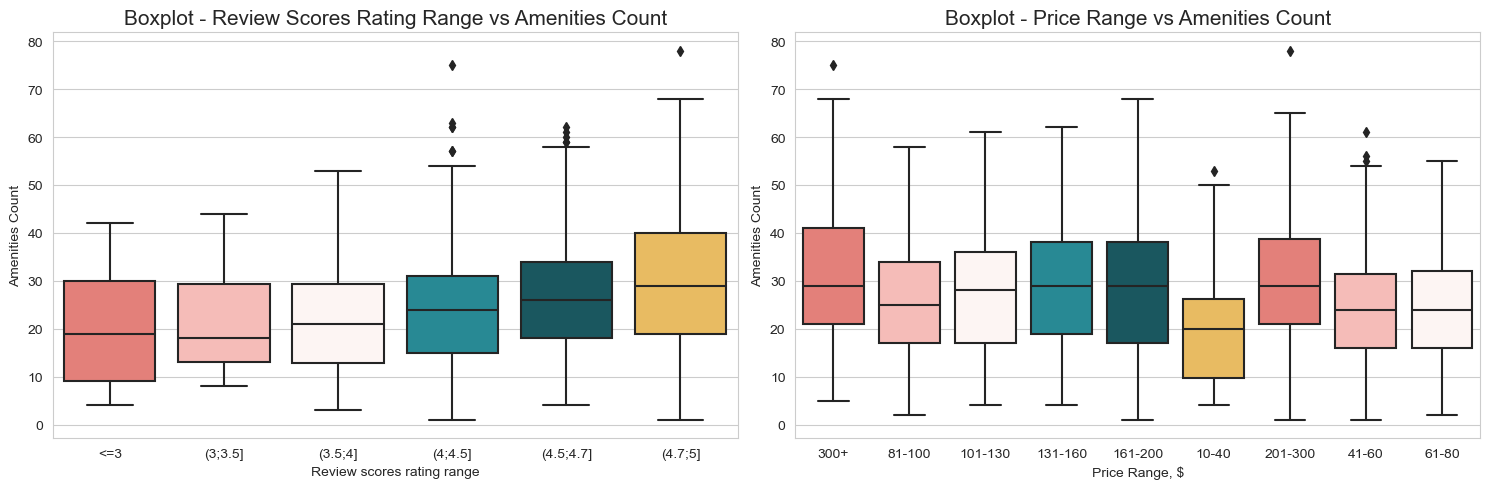

In [26]:
# Set the figure size
plt.figure(figsize=(15, 5))

# Create the first boxplot for 'rating_range'
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
sns.boxplot(x='rating_range', y='amenities_count', data=df, palette=custom_palette)
plt.xlabel('Review scores rating range')
plt.ylabel('Amenities Count')
plt.title('Boxplot - Review Scores Rating Range vs Amenities Count', fontsize=15)

# Sort the DataFrame by 'price' for the second boxplot
df.sort_values(by='price', ascending=True, inplace=True)

# Create the second boxplot for 'price_range'
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
# Create a boxplot using seaborn
sns.boxplot(x='price_range_$', y='amenities_count', data=df, palette=custom_palette)
# Set labels and title
plt.xlabel('Price Range, $')
plt.ylabel('Amenities Count')
plt.title('Boxplot - Price Range vs Amenities Count', fontsize=15)

# Adjust layout to prevent overlapping
plt.tight_layout()
# Display the plot
plt.show()

#### The greater the number of conveniences in the listing, the higher the rating score and price.

In [27]:
# Calculate statistics grouped by 'rating_range' for 'amenities_count'
stats_rating_amenities = calculate_statistics(df, 'rating_range', 'amenities_count')
# Sort by 'rating_range' using the defined order
stats_rating_amenities = stats_rating_amenities.reindex(rating_ranges_order)
stats_rating_amenities

,count,mean,median,min,max,std,iqr,Q1,Q2,Q3,mode
rating_range,,,,,,,,,,,
<=3,41,19.88,19.00,4,42,11.27,21.00,9.00,19.00,30.00,8
(3;3.5],22,21.27,18.00,8,44,10.63,16.25,13.00,18.00,29.25,8
(3.5;4],144,21.94,21.00,3,53,11.26,16.50,12.75,21.00,29.25,18
(4;4.5],392,24.09,24.00,1,75,11.76,16.00,15.00,24.00,31.00,13
(4.5;4.7],941,26.71,26.00,4,62,11.49,16.00,18.00,26.00,34.00,30
(4.7;5],1811,29.84,29.00,1,78,13.47,21.00,19.00,29.00,40.00,32


#### Both the mean and median counts of amenities generally increase as the rating range becomes more positive. For instance, the mean count of amenities increases from 19.88 for the lowest rating range (<=3) to 29.84 for the highest rating range (4.7;5]. This suggests a trend where higher-rated accommodations tend to offer more amenities on average. The standard deviation remains relatively consistent across different rating ranges, ranging from 10.63 to 11.76 and only for the highest range is quite different 13.47 . This suggests that while the mean count of amenities increases with higher ratings, the variability in the count of amenities remains fairly stable across different ratings, except for the highest range. The IQR is larger for the smallest and highest rating ranges, indicating a wider range of amenity counts within those ranges. The mode varies across different rating ranges. This suggests that while certain counts of amenities are more common within each rating range, there is still variability in the distribution of amenity counts.

In [28]:
# Calculate statistics grouped by 'price_range_$' for 'amenities_count'
stats_price_amenities = calculate_statistics(df, 'price_range_$', 'amenities_count')
# Define the order of price ranges
price_ranges_order = ['10-40', '41-60', '61-80', '81-100', '101-130', '131-160', '161-200', '201-300', '300+']
# Sort by 'price_range_$' using the defined order
stats_price_amenities = stats_price_amenities.reindex(price_ranges_order)
stats_price_amenities

,count,mean,median,min,max,std,iqr,Q1,Q2,Q3,mode
price_range_$,,,,,,,,,,,
10-40,120,20.33,20.00,4,53,11.93,16.50,9.75,20.00,26.25,8
41-60,267,24.62,24.00,1,61,11.41,15.50,16.00,24.00,31.50,19
61-80,366,24.59,24.00,2,55,11.24,16.00,16.00,24.00,32.00,24
81-100,438,25.92,25.00,2,58,11.29,17.00,17.00,25.00,34.00,32
101-130,432,27.87,28.00,4,61,13.01,19.00,17.00,28.00,36.00,28
131-160,349,29.05,29.00,4,62,12.59,19.00,19.00,29.00,38.00,30
161-200,384,28.65,29.00,1,68,13.71,21.00,17.00,29.00,38.00,26
201-300,502,29.74,29.00,1,78,13.04,17.75,21.00,29.00,38.75,30
300+,493,31.60,29.00,5,75,13.64,20.00,21.00,29.00,41.00,29


#### Both the mean and median counts of amenities generally increase as the price range increases. For instance, the mean count of amenities increases from 20.33 for the price range 10-40 to 31.60 for the highest price range of 300+. This suggests a trend where accommodations with higher prices tend to offer more amenities on average. The standard deviation varies across different price ranges, ranging from 11.24 to 13.71. This suggests that while there is generally an increase in the count of amenities with higher prices, the variability in the count of amenities also varies across different price brackets. The mode varies across different price ranges. This suggests that while certain counts of amenities are more common within each price range, there is still variability in the distribution of amenity counts.
#### In summary, both higher ratings and higher prices are associated with accommodations offering more amenities on average, with some variability within each category.

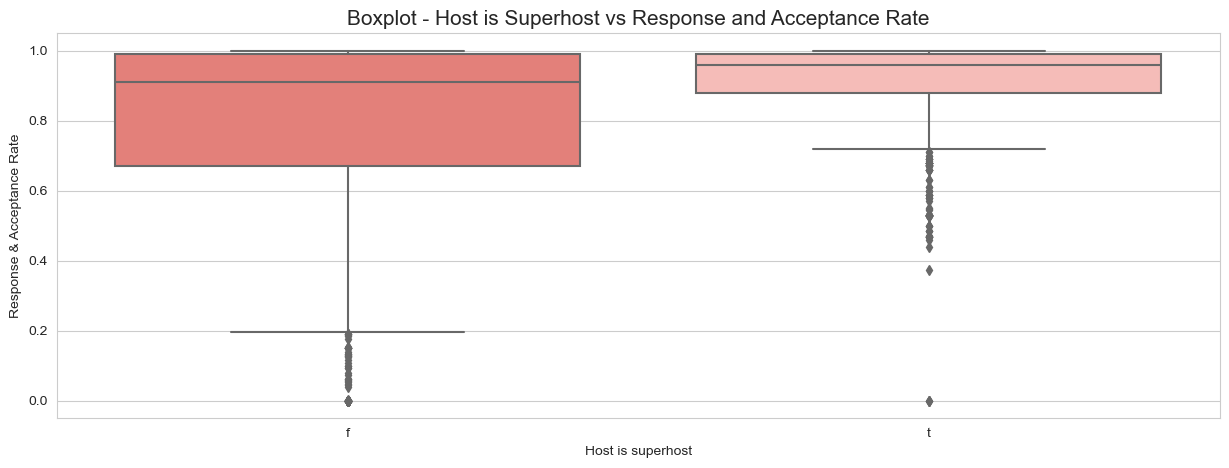

In [29]:
# Set the figure size for the plot
plt.figure(figsize=(15, 5)) 
# Create a boxplot using seaborn
sns.boxplot(x='host_is_superhost', y='combined_response_acceptance', data=df, palette=custom_palette)
# Set labels and title
plt.xlabel('Host is superhost')
plt.ylabel('Response & Acceptance Rate')
plt.title('Boxplot - Host is Superhost vs Response and Acceptance Rate', fontsize=15)
# Display the plot
plt.show()

#### The response and acceptance rates are typically higher when a host holds the Superhost status.

In [30]:
# Calculate statistics grouped by 'host_is_superhost' for 'combined_response_acceptance'
stats_superhost_response_acceptance = calculate_statistics(df, 'host_is_superhost', 'combined_response_acceptance')
stats_superhost_response_acceptance

,count,mean,median,min,max,std,iqr,Q1,Q2,Q3,mode
host_is_superhost,,,,,,,,,,,
f,2442,0.80,0.91,0.00,1.00,0.26,0.32,0.67,0.91,0.99,1.00
t,909,0.91,0.96,0.00,1.00,0.13,0.11,0.88,0.96,0.99,1.00


#### Superhosts have a noticeably higher mean 0.91 and median 0.96 combined response and acceptance rate compared to non-superhosts with a mean of 0.80 and a median of 0.91. Superhosts exhibit lower variability in combined response and acceptance rates with a standard deviation of 0.13 compared to non-superhosts with a standard deviation of 0.26. This indicates that superhosts tend to have more consistent response and acceptance rates. The interquartile range for superhosts is narrower compared to non-superhosts, suggesting that the majority of superhosts maintain a high combined response and acceptance rate consistently. The mode is 1.00 for both superhosts and non-superhosts, indicating that the most common combined response and acceptance rate for both groups is 100%, although this is more prevalent among superhosts. Overall, these insights suggest that superhosts tend to have higher combined response and acceptance rates compared to non-superhosts, with lower variability and a narrower range of rates, indicating a more consistent level of responsiveness and acceptance among superhosts.